# 8-Gaussians 

In [1]:
import torch
import matplotlib.pyplot as plt
import random

from markov_bridges.configs.config_classes.generative_models.cfm_config import CFMConfig
from markov_bridges.configs.config_classes.data.basics_configs import GaussiansConfig
from markov_bridges.configs.config_classes.trainers.trainer_config import CFMTrainerConfig
from markov_bridges.configs.config_classes.networks.continuous_network_config import DeepMLPConfig
from markov_bridges.configs.config_classes.pipelines.pipeline_configs import CFMPipelineConfig
from markov_bridges.models.trainers.cfm_trainer import CFMTrainer
from markov_bridges.utils.experiment_files import ExperimentFiles


model_config = CFMConfig()
model_config.data = GaussiansConfig(target_continuous_type="Ngaussian", 
                                    number_of_gaussians=8,
                                    has_context_discrete=False,
                                    has_target_discrete=False,
                                    batch_size=128,
                                    total_data_size=64000,
                                    train_data_size=51200,
                                    test_data_size=12800,)

model_config.continuous_network = DeepMLPConfig(num_layers=2,
                                                time_embed_dim=16, 
                                                dropout=0.1)

model_config.trainer = CFMTrainerConfig(debug=False, learning_rate=1e-4)
model_config.trainer.conditional_bridge_type = 'linear'
model_config.trainer.number_of_epochs=100
model_config.trainer.device = "cuda:0"
model_config.trainer.paralellize_gpu = False
model_config.trainer.metrics = []

model_config.thermostat.gamma = 0.01

model_config.pipeline = CFMPipelineConfig(number_of_steps=200)
model_config.pipeline.ode_solver = 'euler'

/tmp/ipykernel_3962209/634239400.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data.source_continuous[:, 0], data.source_continuous[:, 1], s=1, cmap="tab10", label="source")
/tmp/ipykernel_3962209/634239400.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data.target_continuous[:, 0], data.target_continuous[:, 1], s=1, cmap="tab10", label="target")


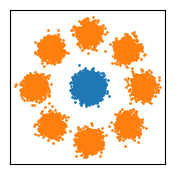

In [2]:
from markov_bridges.data.gaussians2D_dataloaders import GaussiansDataloader

dataloader = GaussiansDataloader(model_config.data)
data = dataloader.get_data_sample(sample_size=8000, train=True)

plt.figure(figsize=(2, 2))
plt.scatter(data.source_continuous[:, 0], data.source_continuous[:, 1], s=1, cmap="tab10", label="source")
plt.scatter(data.target_continuous[:, 0], data.target_continuous[:, 1], s=1, cmap="tab10", label="target")
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()

In [3]:
id = str(random.randint(0, 10000))

experiment_files = ExperimentFiles(experiment_name="cfm", experiment_type="Ngaussians", experiment_indentifier=id) 
trainer = CFMTrainer(config=model_config, experiment_files=experiment_files)
trainer.train()

# ==================================================
# START OF TRAINING 
# ==================================================
# Current Model ************************************
Ngaussians
cfm
4607
# ==================================================
# Number of Epochs 20
# ==================================================


Epoch 20, Loss: 0.1255: 100%|██████████| 20/20 [01:29<00:00,  4.47s/it]


({'model': DeepMLP(
    (act_fn): ReLU()
    (encoding_model): Sequential(
      (0): Linear(in_features=18, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Linear(in_features=128, out_features=128, bias=True)
      (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
    (continuous_head): Linear(in_features=128, out_features=2, bias=True)
  ),
  'best_loss': 0.10426666468381882,
  'training_loss': 0.10298873894847929,
  'test_loss': 0.10257877290248871,
  'all_training_loss': [0.8564237952232361,
   0.7846115827560425,
   0.7496671676635742,
   0.7212070822715759,
   0.7347797155380249,
   0.6259982585906982,
   0.6327110528945923,
   0.5618516206741333,
   0.5864596366882324,
   0.5445420742034912,
   0.5058403015136719,
   0.5604666471481323,
   0.5021029710769653,
   0.4587756097316742,
   0.4751388430595398,
   0.4848241209

In [5]:
from markov_bridges.models.generative_models.cfm import CFM
from markov_bridges.data.gaussians2D_dataloaders import GaussiansDataloader

path = '/home/df630/markov_bridges/results/cfm/Ngaussians/' + id

cfm = CFM(experiment_dir=path)
dataloader = GaussiansDataloader(model_config.data)
model_config.pipeline.time_epsilon = 0.0
model_config.pipeline.time_steps = 200

trajectories = []

for databatch in dataloader.test():
    sample = cfm.pipeline.generate_sample(databatch)
    trajectories.append(sample.trajectories.detach().cpu())

trajectories = torch.cat(trajectories, dim=0)


/tmp/ipykernel_3953069/2831354619.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trajectories[:,0,0], trajectories[:,0,1], s=1, cmap="tab10", label=r"$t=0$")
/tmp/ipykernel_3953069/2831354619.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trajectories[:,-1,0], trajectories[:,-1,1],  s=1,  cmap="tab10", label=r"$t=1$")


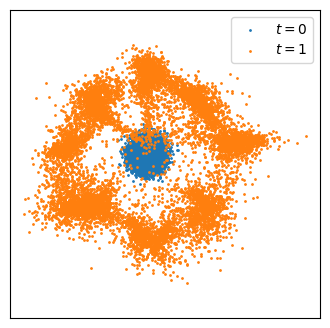

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(4, 4))
plt.scatter(trajectories[:,0,0], trajectories[:,0,1], s=1, cmap="tab10", label=r"$t=0$")
plt.scatter(trajectories[:,-1,0], trajectories[:,-1,1],  s=1,  cmap="tab10", label=r"$t=1$")
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.legend()
plt.show()

/tmp/ipykernel_3943899/2831354619.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trajectories[:,0,0], trajectories[:,0,1], s=1, cmap="tab10", label=r"$t=0$")
/tmp/ipykernel_3943899/2831354619.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trajectories[:,-1,0], trajectories[:,-1,1],  s=1,  cmap="tab10", label=r"$t=1$")


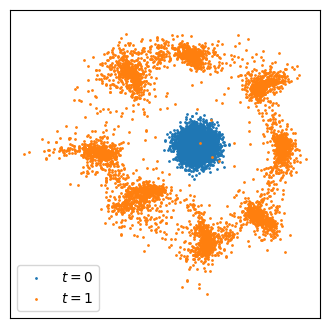

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(4, 4))
plt.scatter(trajectories[:,0,0], trajectories[:,0,1], s=1, cmap="tab10", label=r"$t=0$")
plt.scatter(trajectories[:,-1,0], trajectories[:,-1,1],  s=1,  cmap="tab10", label=r"$t=1$")
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.legend()
plt.show()